In [ ]:
#Set kaggle API
import os
os.environ['KAGGLE_USERNAME'] = "riskynovendri"
os.environ['KAGGLE_KEY'] = "85f5df9459b1eca7e95ca56fc70d8fa1"

In [ ]:
#Get Dataset
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda
# !kaggle datasets download -d puneet6060/intel-image-classification/version/2 

 98% 367M/376M [00:02<00:00, 151MB/s]
100% 376M/376M [00:02<00:00, 136MB/s]


Created By : Risky Novendri, Kota Jambi, Jambi

In [ ]:
#Import Library
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D

In [ ]:
import zipfile
zip_dir = '/content/animal-image-datasetdog-cat-and-panda.zip'
extract = zipfile.ZipFile(zip_dir, 'r')
extract.extractall('/content')
extract.close()

In [ ]:
data_dir = '/content/animals/animals'
os.listdir(data_dir) #Checking Dataset

['dogs', 'cats', 'panda']

In [ ]:
panda_dir = os.path.join(data_dir, 'panda')
cat_dir = os.path.join(data_dir, 'cats')
dog_dir = os.path.join(data_dir, 'dogs')

In [ ]:
#Checking Number of data
print('Data Panda :',len(os.listdir(panda_dir)))
print('Data Cat :',len(os.listdir(cat_dir)))
print('Data Dogs :',len(os.listdir(dog_dir)))

Data Panda : 1000
Data Cat : 1000
Data Dogs : 1000


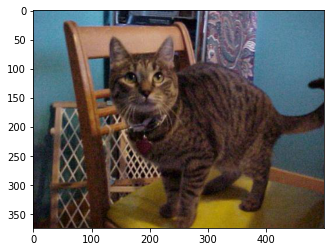

In [ ]:
cat = image.load_img('/content/animals/animals/cats/cats_00001.jpg')
imgplot = plt.imshow(cat)

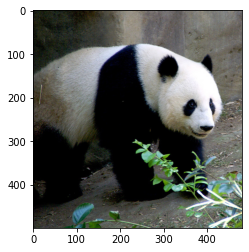

In [ ]:
panda = image.load_img('/content/animals/animals/panda/panda_00001.jpg')
imgplot = plt.imshow(panda)

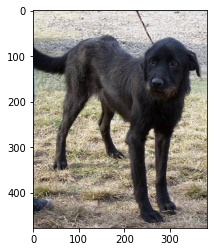

In [ ]:
dog = image.load_img('/content/animals/animals/dogs/dogs_00001.jpg')
imgplot = plt.imshow(dog)

In [ ]:
aug = ImageDataGenerator( #Image Augmentation
    rescale = 1./255,
    shear_range=0.3,
    rotation_range=20,
    zoom_range=0.3,
    vertical_flip = True,
    horizontal_flip=True,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [ ]:
train = aug.flow_from_directory( #Generate Train Data
    data_dir,
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'categorical',
    shuffle = True,
    classes = ['cats','dogs','panda'],
    # classes = ["buildings","forest","glacier","mountain","sea","street"],
    subset = 'training'
)
val = aug.flow_from_directory( #Generate Val Data
    data_dir, 
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'categorical',
    shuffle = False,
    classes = ['cats','dogs','panda'],
    # classes = ["buildings","forest","glacier","mountain","sea","street"],
    subset = 'validation'
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import VGG16

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([ #Create Model Sequence
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam #Compile Model
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow as tf #Create Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.80):
      print("\nAkurasi Terpenuhi!,Akurasi > 85%")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
record = model.fit(train, validation_data=val, epochs=100,batch_size=256, callbacks=callbacks, verbose=1 ) #Train Model

Epoch 1/100
19/19 [==============================] - 143s 7s/step - loss: 1.0403 - accuracy: 0.4112 - val_loss: 1.0117 - val_accuracy: 0.5383
Epoch 2/100
19/19 [==============================] - 142s 7s/step - loss: 0.8628 - accuracy: 0.5562 - val_loss: 0.8224 - val_accuracy: 0.5817
Epoch 3/100
19/19 [==============================] - 140s 7s/step - loss: 0.8148 - accuracy: 0.5800 - val_loss: 0.7933 - val_accuracy: 0.5900
Epoch 4/100
19/19 [==============================] - 142s 7s/step - loss: 0.7709 - accuracy: 0.6046 - val_loss: 0.8060 - val_accuracy: 0.5717
Epoch 5/100
19/19 [==============================] - 142s 7s/step - loss: 0.7436 - accuracy: 0.6212 - val_loss: 0.7479 - val_accuracy: 0.5950
Epoch 6/100
19/19 [==============================] - 145s 8s/step - loss: 0.7047 - accuracy: 0.6288 - val_loss: 0.7491 - val_accuracy: 0.6017
Epoch 7/100
19/19 [==============================] - 143s 7s/step - loss: 0.7004 - accuracy: 0.6629 - val_loss: 0.6876 - val_accuracy: 0.6617
Epoch 

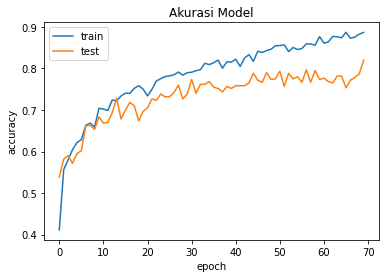

In [ ]:
#Visualize Accuracy Model
plt.plot(record.history['accuracy'])
plt.plot(record.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

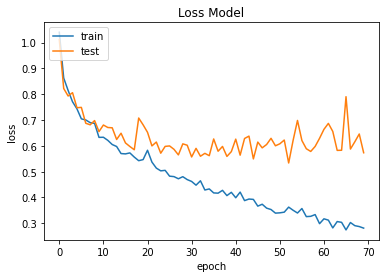

In [ ]:
#Visualize Loss
plt.plot(record.history['loss'])
plt.plot(record.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert() #keep model

INFO:tensorflow:Assets written to: /tmp/tmprb4js9_c/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)